In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.basemap import Basemap
%matplotlib inline


In [2]:
import lsst.ts.observatory.model as om

In [3]:
observatoryModel = om.ObservatoryModel()
observatoryModel.configure_from_module()

In [4]:
# Grab the default configuration dictionary.
# This can be edited to change things like dome slew speeds.
defualt_dict = observatoryModel.get_configure_dict()

In [5]:
# Set up grid to calculate slew times *to*
altitude = np.arange(0, 90, 0.25)
azimuth = np.arange(-180, 180, 0.5)
alt, az = np.meshgrid(altitude, azimuth)

In [6]:
# Set location of telescope
telAlt = 45.0
telAz = 0.0
observatoryModel.slew_altaz(time=0, alt_rad=np.radians(telAlt), az_rad=np.radians(telAz), 
                            rot_rad=0, band_filter='r')
print(observatoryModel.current_state)

t=47.7 ra=29.677 dec=14.756 ang=180.000 filter=r track=False alt=45.000 az=0.000 pa=180.000 rot=0.000 telaz=0.000 telrot=0.000 mounted=['g', 'r', 'i', 'z', 'y'] unmounted=['u']


In [7]:
# Calculate slew times
slewtimes_default = observatoryModel.get_approximate_slew_delay(alt_rad=np.radians(alt), 
                                                                az_rad=np.radians(az), 
                                                                goal_filter='r', lax_dome=False)
# set the extent limit for imshow so it matches the altitude and azimuth grid.
extent = [azimuth[0], azimuth[-1], altitude[0], altitude[-1]]

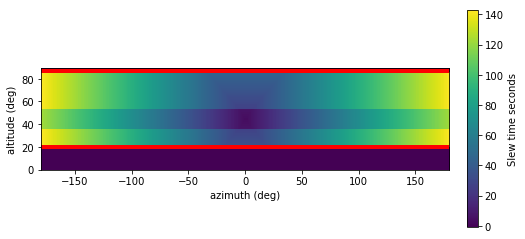

In [8]:
# Plot slew times
plt.figure(figsize=(8,4))
cs = plt.imshow(slewtimes_default.T,origin='lower',extent=extent)
cbar_bar = plt.colorbar(cs ,fraction=0.046, pad=0.04,label='Slew time seconds')
#Plot telescope altitude limits
plt.axhline(y = defualt_dict['telescope']['altitude_minpos'],color='r',lw=4)
plt.axhline(y = defualt_dict['telescope']['altitude_maxpos'],color='r',lw=4)
plt.xlabel('azimuth (deg)')
plt.ylabel('altitude (deg)')

In [9]:
def plotSlewTimes(altitude = None, azimuth = None, telAlt = 45.0, telAz = 0.0, conf_dict = None):
    """
    A fuction to plot the slew times to a grid of alt/az points 
    from a starring telAlt and telAz.
    This function allows the user to pass a new configuration dictionary to
    the observatoryModel.
    
    Parameters
    ----------
    altitude : opt, array
    Array of altitude values in degrees
    azimuth : opt, array
    Array of azimuth valuesin degrees
    telAlt : opt, float
    Starting altitude of telescope in degrees
    telAz : opt, float
    Starting azimuth of telescope in degrees
    conf_dict : opt, dict
    Configuration dict for ObservatoryModel
    """
    
    observatoryModel = om.ObservatoryModel()
    if conf_dict is None:
        # Use default configuration if one is not provided.
        observatoryModel.configure_from_module()
    else:
        # Configure observatory model with new dictionary.
        observatoryModel.configure(conf_dict)
        
    current_dict = observatoryModel.get_configure_dict()
    if altitude is None:
        altitude = np.arange(0, 90, 0.25)
    if azimuth is None:
        azimuth = np.arange(-180, 180, 0.5)
    
    alt, az = np.meshgrid(altitude, azimuth)
    
    observatoryModel.slew_altaz(time=0, alt_rad=np.radians(telAlt), az_rad=np.radians(telAz), 
                            rot_rad=0, band_filter='r')
    
    slewtimes = observatoryModel.get_approximate_slew_delay(alt_rad=np.radians(alt), 
                                                           az_rad=np.radians(az), 
                                                           goal_filter='r', lax_dome=False)
    extent = [azimuth[0], azimuth[-1], altitude[0], altitude[-1]]
    
    print(observatoryModel.current_state)
    
    # Plot slew times
    plt.figure(figsize=(12,8))
    # Mask out slews that are beyond the altitude limits.
    slewtimes_masked = np.ma.masked_where(slewtimes == -1, slewtimes)
    cs = plt.imshow(slewtimes_masked.T,origin='lower',extent=extent)
    cbar_bar = plt.colorbar(cs ,fraction=0.046, pad=0.04,label='Slew time seconds')
    print cbar_bar.get_clim()
    #Plot telescope altitude limits
    plt.plot(telAz,telAlt,'wH',ms=12,label='Starting point',mec='red',mew=2)
    plt.axhline(y = current_dict['telescope']['altitude_maxpos']
                ,color='k',lw=3,ls='--',label='alt max')
    plt.axhline(y = current_dict['telescope']['altitude_minpos'],
                color='k',lw=3,label='alt min')
    plt.xlabel('azimuth (deg)')
    plt.ylabel('altitude (deg)')
    plt.legend(loc=3,ncol=3)
    plt.show()
    
    
    

In [10]:
# Checkout the current dome configuration.
defualt_dict['dome']

{u'altitude_accel': 0.875,
 u'altitude_decel': 0.875,
 u'altitude_maxspeed': 1.75,
 u'azimuth_accel': 0.75,
 u'azimuth_decel': 0.75,
 u'azimuth_maxspeed': 1.5,
 u'settle_time': 1.0}

In [11]:
# Increase the dome azimuth slew parameters by a factor of 20.
# Create a new configuration dictionary
fast_dome_az_dict = copy.deepcopy(defualt_dict)
fast_dome_az_dict['dome']['azimuth_accel'] = defualt_dict['dome']['azimuth_accel']*20
fast_dome_az_dict['dome']['azimuth_decel'] = defualt_dict['dome']['azimuth_decel']*20
fast_dome_az_dict['dome']['azimuth_maxspeed'] = defualt_dict['dome']['azimuth_maxspeed']*20

In [12]:
# Increase the default dome altitude slew parameters by a factor of 20.
# Create a new configuration dictionary
fast_dome_alt_dict = copy.deepcopy(defualt_dict)
fast_dome_alt_dict['dome']['altitude_accel'] = defualt_dict['dome']['altitude_accel']*20
fast_dome_alt_dict['dome']['altitude_decel'] = defualt_dict['dome']['altitude_decel']*20
fast_dome_alt_dict['dome']['altitude_maxspeed'] = defualt_dict['dome']['altitude_maxspeed']*20

t=47.7 ra=29.677 dec=14.756 ang=180.000 filter=r track=False alt=45.000 az=0.000 pa=180.000 rot=0.000 telaz=0.000 telrot=0.000 mounted=['g', 'r', 'i', 'z', 'y'] unmounted=['u']
(2.0, 143.0)


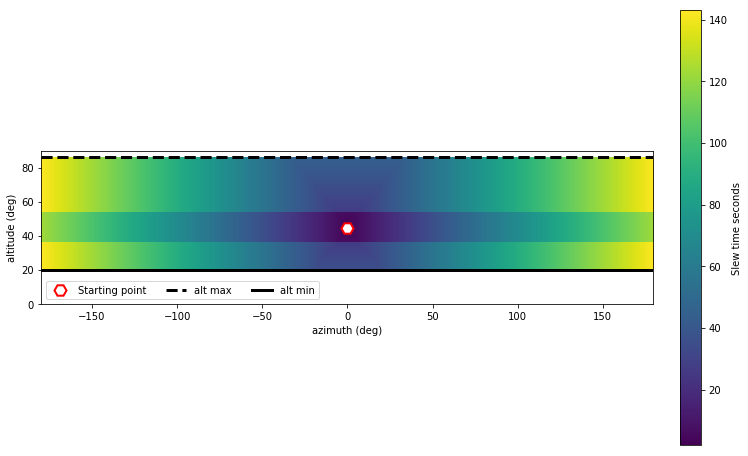

In [13]:
plotSlewTimes()

t=47.7 ra=29.677 dec=14.756 ang=180.000 filter=r track=False alt=45.000 az=0.000 pa=180.000 rot=0.000 telaz=0.000 telrot=0.000 mounted=['g', 'r', 'i', 'z', 'y'] unmounted=['u']
(2.0, 49.714285714285715)


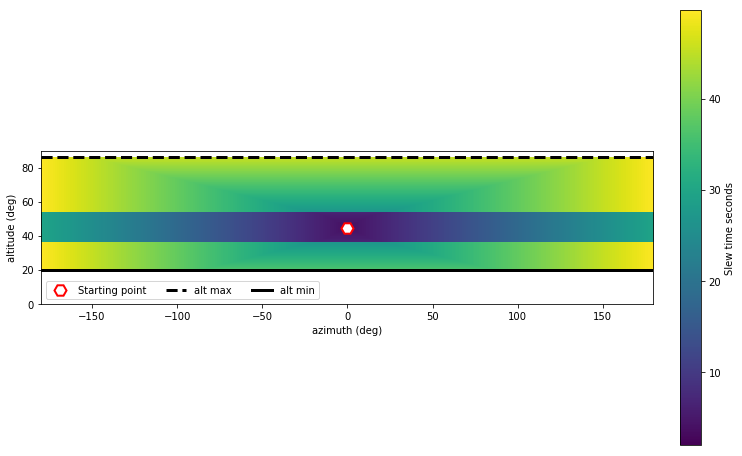

In [14]:
plotSlewTimes(conf_dict=fast_dome_az_dict)

t=44.7 ra=29.664 dec=14.756 ang=180.000 filter=r track=False alt=45.000 az=0.000 pa=180.000 rot=0.000 telaz=0.000 telrot=0.000 mounted=['g', 'r', 'i', 'z', 'y'] unmounted=['u']
(2.0, 143.0)


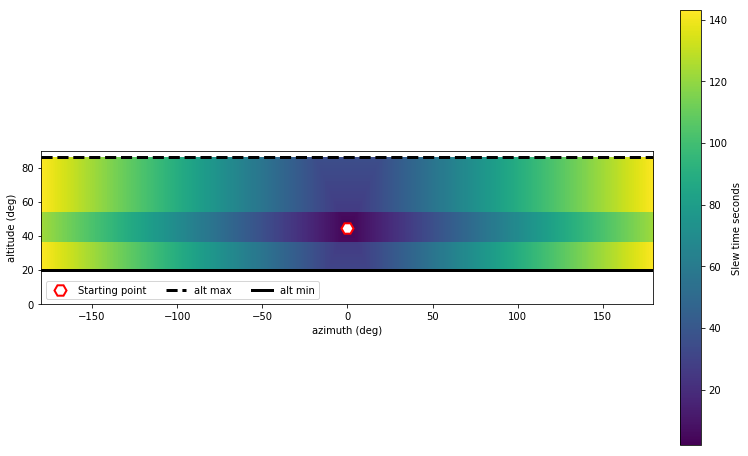

In [15]:
plotSlewTimes(conf_dict=fast_dome_alt_dict)